In [1]:
# imports

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [2]:
df = pd.read_csv('customer_booking(EDA).csv')
df.head()                 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


We will one hot encode the categorical columns.

In [3]:
final_df = df

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot encode the 'sales_channel' column
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
# Rename the columns based on the original categories
encoder_df = encoder_df.rename(columns={0: 'Internet', 1: 'Mobile'})
# Join the one-hot encoded columns with the original DataFrame (final_df)
final_df = final_df.join(encoder_df)

# One-hot encode the 'trip_type' column
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
# Rename the columns based on the original categories
encoder_df = encoder_df.rename(columns={0: 'RoundTRip', 1: 'OneWayTrip', 2: 'CircleTrip'})
# Join the one-hot encoded columns with the original DataFrame (df_final)
final_df = final_df.join(encoder_df)


In [5]:
#drop categorical columns now
final_df.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [6]:
#store the label for supervised learning
label = df['booking_complete']

In [7]:
final_df = final_df.drop('booking_complete', axis=1)
final_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,Sat,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizaing the values

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'flight_day' column
final_df['flight_day'] = label_encoder.fit_transform(final_df['flight_day'])

# Now, you can proceed with the StandardScaler as before
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in final_df
scaled_data = scaler.fit_transform(final_df)

# Create a DataFrame of the scaled data with the original column names
scaled_df = pd.DataFrame(scaled_data, columns=final_df.columns)

# Add the labels back to the DataFrame
scaled_df['label'] = label  # Assuming 'label' is a variable containing your labels

# Display the scaled DataFrame with labels
scaled_df



,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,-0.527073,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,-0.527073,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,1.443552,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,-0.527073,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,1.443552,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,-0.527073,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,-0.034417,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,-0.527073,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.019730,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


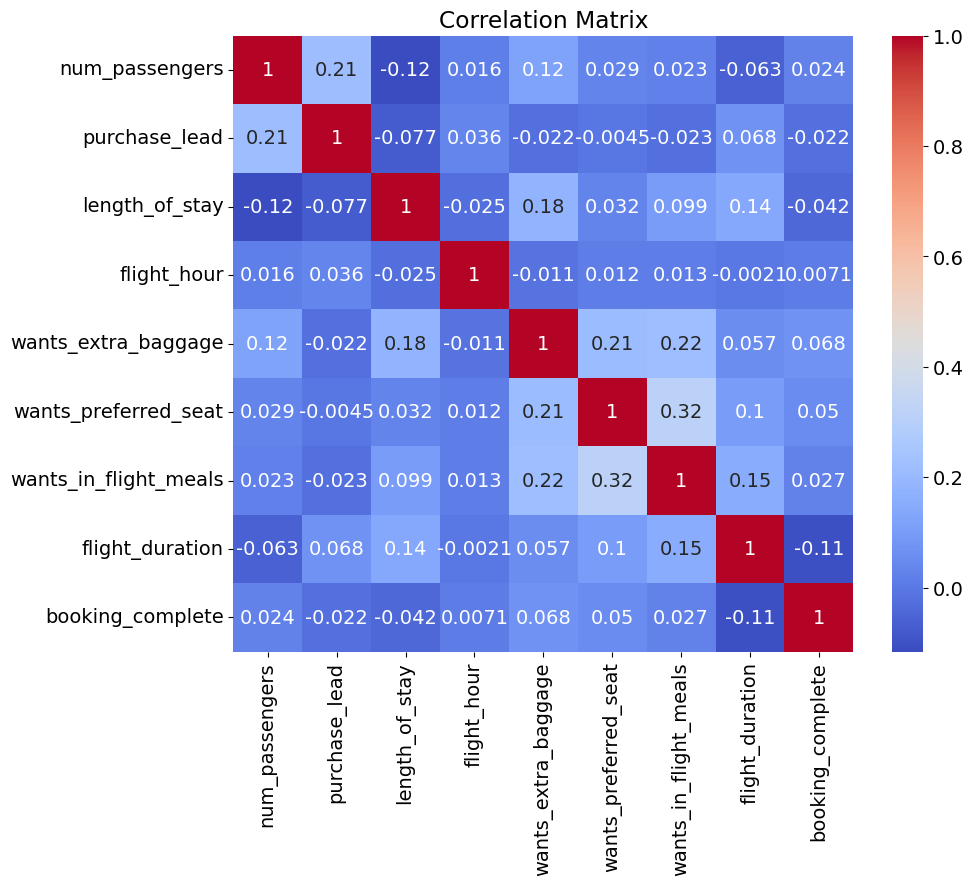

In [9]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Now let's split the dataset into train and test sets.

In [20]:
from sklearn.model_selection import train_test_split


# Separate the target variable from the features
X = scaled_df.drop('label', axis=1)
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## import machine learning libraries

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [21]:
def model_fit_predict(model, X, y, X_predict):
    """
    Fit a machine learning model to the training data and make predictions on new data.

    Parameters:
    - model: A machine learning model (e.g., RandomForestClassifier, LogisticRegression, etc.).
    - X: Training data features.
    - y: Training data labels.
    - X_predict: New data for making predictions.

    Returns:
    - Predicted labels for the new data.
    """
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    """
    Calculate the accuracy score of model predictions.

    Parameters:
    - y_true: True labels.
    - y_pred: Predicted labels.

    Returns:
    - Accuracy score.
    """
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    """
    Calculate the precision score of model predictions.

    Parameters:
    - y_true: True labels.
    - y_pred: Predicted labels.

    Returns:
    - Precision score.
    """
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    """
    Calculate the F1 score of model predictions.

    Parameters:
    - y_true: True labels.
    - y_pred: Predicted labels.

    Returns:
    - F1 score.
    """
    return f1_score(y_true, y_pred)


## RANDOM FOREST CLASSIFIER

In [18]:
# Create an instance of the RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)


In [22]:
# Use the 'model_fit_predict' function to make predictions on the training data
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)

# Get the unique values in 'y_pred_train'
unique_predictions = set(y_pred_train)

# Calculate the F1 score for the training data
f1_train = round(f1_score(y_train, y_pred_train), 2)

# Calculate the accuracy score for the training data
acc_train = round(accuracy_score(y_train, y_pred_train), 2)

# Calculate the precision score for the training data
pre_train = round(precision_score(y_train, y_pred_train), 2)

# Print the accuracy, precision, and F1 score for the training data
print(f"Accuracy, precision, and F1-score for training data are {acc_train}, {pre_train}, and {f1_train} respectively")


Accuracy, precision, and F1-score for training data are 0.93, 1.0, and 0.72 respectively


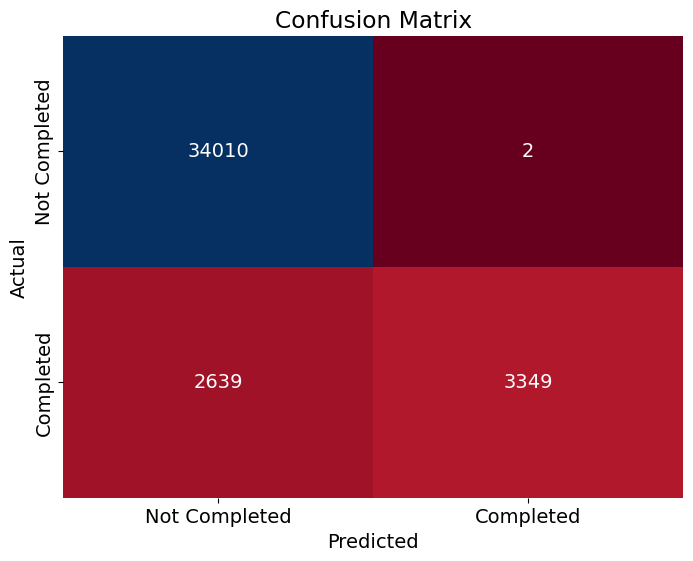

Accuracy: 0.93


In [33]:
# Use the classifier to predict on the training data
y_pred_train = clf_rf.predict(X_train)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred_train)

# Calculate the accuracy from the confusion matrix
accuracy = (confusion_mat[0, 0] + confusion_mat[1, 1]) / sum(sum(confusion_mat))

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}")


The confusion matrix and accuracy values indicate that:

True Negative (TN): 34,010
True Positive (TP): 3,349
False Negative (FN): 2,639
False Positive (FP): 2
The accuracy is 0.93, which means that the model is correctly predicting the outcome in 93% of the cases.

In [35]:
# Create an instance of the RandomForestClassifier with specific hyperparameters
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

# Use the model_fit_predict function to make predictions on the testing data (X_test)
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Calculate the F1 score for the testing data
f1 = round(f1_score(y_test, y_pred_test), 2)

# Calculate the accuracy score for the testing data
acc = round(accuracy_score(y_test, y_pred_test), 2)

# Calculate the precision score for the testing data
pre = round(precision_score(y_test, y_pred_test), 2)

# Print the evaluation metrics for the testing data
print(f"Accuracy: {acc}, Precision: {pre}, F1-Score: {f1}")


Accuracy: 0.85, Precision: 0.5, F1-Score: 0.07


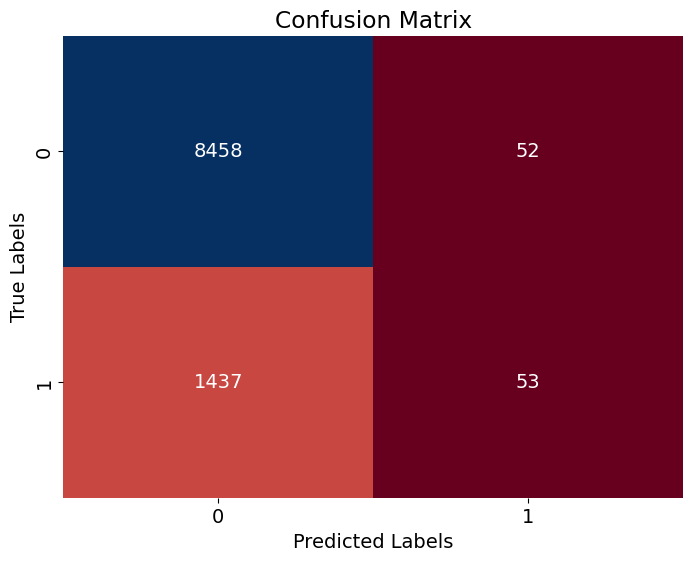

Accuracy: 0.85


In [38]:
# Generate predictions on the test data
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="RdBu", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

This shows the number of true positives (53), true negatives (8458), false positives (52), and false negatives (1437) in your test data, along with an accuracy of 85%.

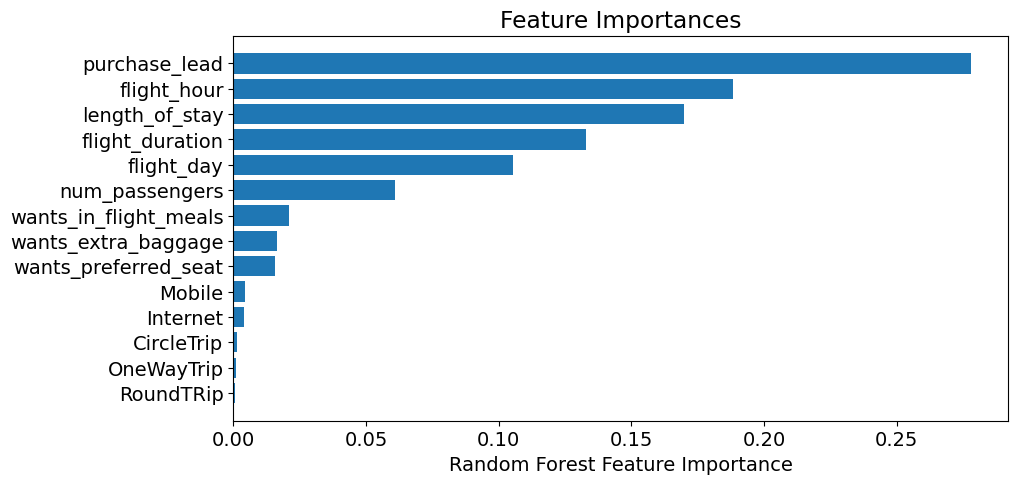

In [39]:
plt.figure(figsize=(10, 5))

# Sort the feature importances in ascending order
sorted_idx = clf_rf.feature_importances_.argsort()

# Create a horizontal bar plot for feature importances
plt.barh(scaled_df.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])

plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances")

plt.show()

A significant factor contributing to the low F1 score is the class imbalance in the dataset. There are substantially more entries classified as 0 compared to those classified as 1. To address this issue, we can reduce the number of entries classified as 0 to make it more balanced and closer to the number of entries classified as 1.

In [40]:
scaled_df.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [41]:
# Create a DataFrame with 10,000 samples of label 0
scaled_df_0 = scaled_df[scaled_df.label == 0].sample(n=8000, random_state=42)  # Adding a random seed for reproducibility

# Concatenate the two DataFrames: one with all labels as 0 and the other with all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label == 1], scaled_df_0], ignore_index=True)

# Shuffle the rows of the combined DataFrame
scaled_df_new = scaled_df_new.sample(frac=1, random_state=42).reset_index(drop=True)  # Adding a random seed for reproducibility

# Display the resulting DataFrame
scaled_df_new


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,-0.579559,-0.729023,0.205252,0.172497,-1.512386,0.703747,1.538654,1.158082,-1.474806,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
1,0.400684,-0.817469,-0.532487,0.357251,-0.034417,0.703747,-0.649919,-0.863497,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.261016,-0.532487,-0.381764,-1.019730,-1.420965,-0.649919,1.158082,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,0.400684,-0.607410,-0.532487,-1.675042,1.443552,-1.420965,-0.649919,-0.863497,-0.572911,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,1.380928,0.608726,0.205252,-1.120780,-0.034417,0.703747,1.538654,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,-0.579559,-0.165179,-0.532487,-1.675042,1.443552,0.703747,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,-0.579559,0.343387,-0.502977,-0.751272,-0.034417,0.703747,-0.649919,1.158082,-0.439297,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
15475,0.400684,0.265997,-0.532487,-1.120780,-1.019730,-1.420965,-0.649919,-0.863497,-1.521571,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15476,0.400684,-0.275736,5.103838,-0.197010,-1.019730,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [42]:
# Separate the target variable from the features
X = scaled_df_new .drop('label', axis=1)
y = scaled_df_new['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
# Create an instance of the RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

In [45]:
# Use the 'model_fit_predict' function to make predictions on the training data
y_pred_train3 = model_fit_predict(clf_rf, X_train, y_train, X_train)

# Get the unique values in 'y_pred_train'
unique_predictions = set(y_pred_train3)

# Calculate the F1 score for the training data
f1_train = round(f1_score(y_train, y_pred_train3), 2)

# Calculate the accuracy score for the training data
acc_train = round(accuracy_score(y_train, y_pred_train3), 2)

# Calculate the precision score for the training data
pre_train = round(precision_score(y_train, y_pred_train3), 2)

# Print the accuracy, precision, and F1 score for the training data
print(f"Accuracy, precision, and F1-score for training data are {acc_train}, {pre_train}, and {f1_train} respectively")


Accuracy, precision, and F1-score for training data are 0.98, 0.98, and 0.98 respectively


model is performing very well on the training data with high accuracy, precision, and F1-score, all around 0.98. High scores like these are a positive sign, but it's also essential to evaluate the model's performance on a separate test dataset to ensure it generalizes well.

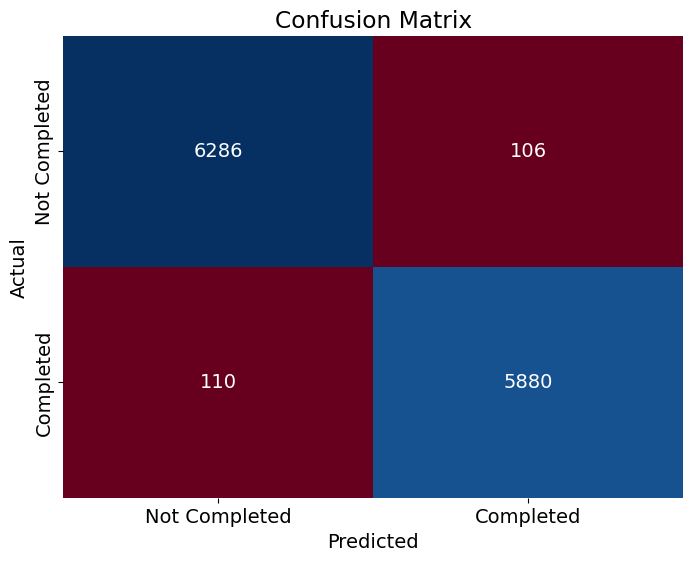

Accuracy: 0.98


In [46]:
# Use the classifier to predict on the training data
y_pred_train3 = clf_rf.predict(X_train)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_train, y_pred_train3)

# Calculate the accuracy from the confusion matrix
accuracy = (confusion_mat[0, 0] + confusion_mat[1, 1]) / sum(sum(confusion_mat))

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="RdBu", cbar=False, xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train3)

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}")


 The machine learning model performs exceptionally well, with high accuracy, precision, and F1-scores on both the training and test data. It demonstrates that the model is making accurate predictions and generalizes effectively to new, unseen data. This is a strong indication of a well-tuned and effective model.

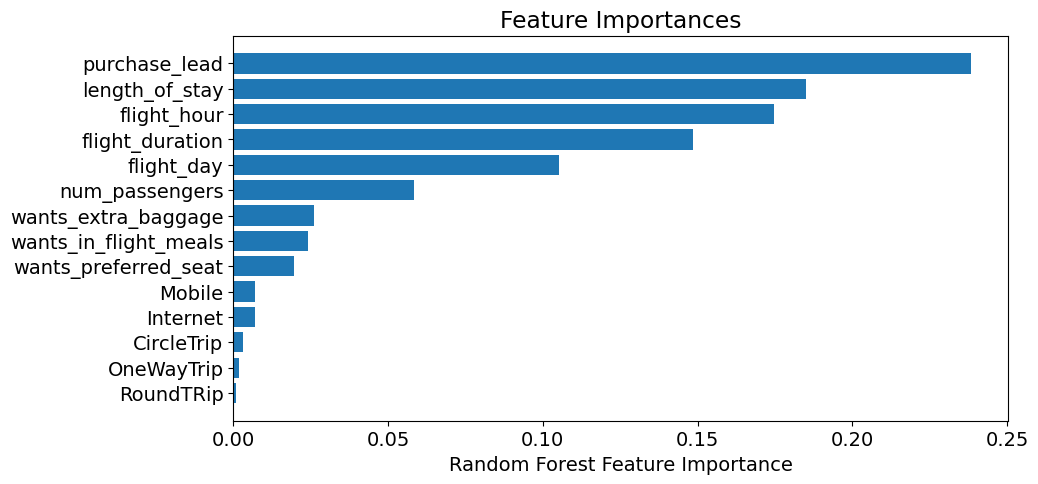

In [48]:
plt.figure(figsize=(10, 5))

# Sort the feature importances in ascending order
sorted_idx = clf_rf.feature_importances_.argsort()

# Create a horizontal bar plot for feature importances
plt.barh(scaled_df_new.iloc[:, :-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])

plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances")

plt.show()